# Для коммитов:
y заменен на z поскольку Нефёдова даёт нам нормально распределенную СВ именно как z

# Ячейка с импортом библиотек

In [86]:
# Загрузка дополнительных библиотек
from scipy.stats import norm, uniform, expon
import matplotlib.pyplot as plt
import numpy as np

# Моделирование случайной величины

#### Параметры моделирования и распределения
$$
\text{sigma\_param} - \sigma\text{, СКО}; \\

\text{mu\_param} - \text{m, математическое ожидание}; \\

\text{n\_values} - \text{число опытов со случайным исходом}; \\

\text{n\_independent} - \text{число независимых случайных величин}.
$$

In [87]:
sigma_param = 3
mu_param=2         
n_values=10000
n_independent = 12

#### Формирование нормально распределенной СВ двумя способами

Встроенная функция из модуля numpy:

In [88]:
z_lib = np.random.normal(
    loc = mu_param,
    scale=sigma_param,
    size=n_values)

Формирование нормально распределенной СВ z из равномерно распределенной СВ x на интервале [0,1) с помощью центральной предельной теоремы:

$$
z = \dfrac{(y - m_y) \sigma}{\sqrt{D_y}} + m, \text{ где} \\
y = \displaystyle\sum_{i=1}^n x_i - \text{формула центральной предельной теоремы}\\
D_y = n/12 - \text{дисперсия СВ y} \\
m_y = n/2 - \text{математическое ожидание СВ y} \\
\sigma = \text{sigma\_param} - \text{СКО ГСВ} \\
m = \text{mu\_param} - \text{математическое ожидание ГСВ}
$$

In [89]:
x = np.random.uniform(low=0.0, high=1.0, size=(n_values, n_independent))
y = np.sum(x, axis=1)
z_custom = (y - n_independent/2)*sigma_param/np.sqrt(n_independent/12) + mu_param

### Графики ПРВ (аналитический и экспериментальный) равномерно распределенной СВ

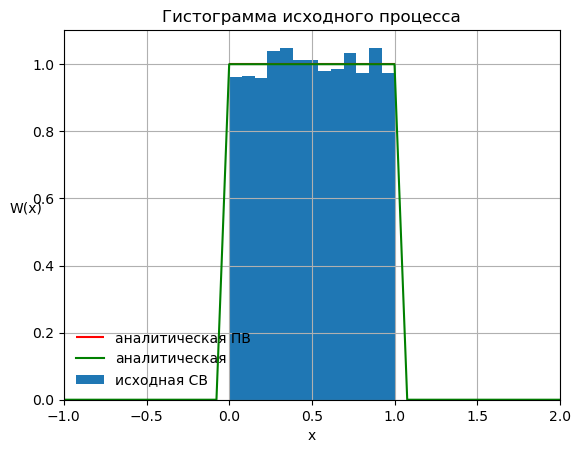

In [90]:
n_edges = 40
x_axis = np.linspace(-1, 2,n_edges)
wx_analityc = ((x_axis>=0) & (x_axis<=1))*1
plt.hlines(1,0,1, color='r', label='аналитическая ПВ')
plt.plot(x_axis,wx_analityc,'g-',label='аналитическая')
plt.hist(x[:,0],density=True, bins=x_axis, label='исходная СВ')
plt.legend(loc='best', frameon=False)
plt.title('Гистограмма исходного процесса')
plt.xlabel('x')
plt.xlim((-1,2))
plt.ylabel('W(x)', rotation='horizontal')
plt.grid(visible=True)
plt.show()

### Графики ПРВ (аналитический и экспериментальный) Гауссовской СВ

In [91]:
n_edges = 40 # число "дискрет" гистограммы
x_axis = np.linspace(
    -3*sigma_param + mu_param,
     3*sigma_param + mu_param,
    n_edges)
wz_analityc = norm.pdf(x_axis,
                      loc=mu_param,
                      scale=sigma_param)

# Графики

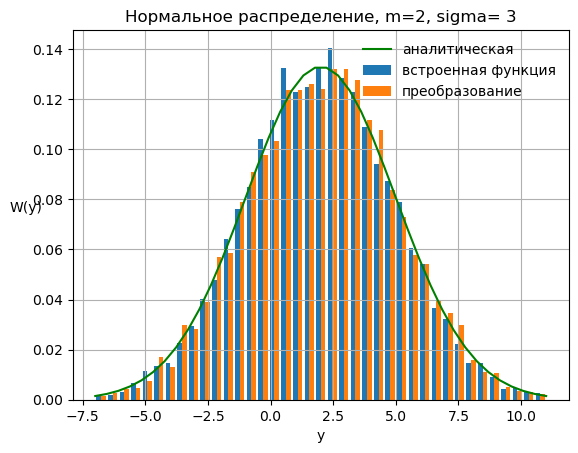

In [92]:

plt.plot(x_axis,wz_analityc,'g-',label='аналитическая')
plt.hist([z_lib,z_custom],density=True,bins=x_axis,label=['встроенная функция','преобразование'])
plt.legend(loc='best', frameon=False)
plt.title('Нормальное распределение, m=' + str(mu_param) + ', sigma= ' + str(sigma_param))
plt.xlabel('y')
plt.ylabel('W(y)', rotation='horizontal')
plt.grid(visible=True)
plt.show()

# ЗАДАНИЕ

Смоделируйте в последующих ячейках распределение, заданное Вам по варианту, опираясь на приведенный выше код